# Import Dependences & Raw Data Set Up

In [104]:
#Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
from dateutil.parser import parse 
import matplotlib as mpl
import seaborn as sns
import scipy.stats as stats

In [3]:
# Alcohol Consumption raw data file to load
file_path = "Data/alcsales_August2020_codedfullfile.csv"

# Read file and store into data frame
alcohol_sales_data = pd.read_csv(file_path)

# Set date/time format
alcohol_sales_data['Month - Year (Date)'] = pd.to_datetime(alcohol_sales_data['Month - Year (Word)'])

# Save updated format to csv
alcohol_sales_data.to_csv(r'Data/alcsales_August2020_codedfullfile_2.csv', index = False)

In [4]:
# Show dataframe head
alcohol_sales_data.head(10)

,Year,Month,FIPS,Beverage,Gallons,Ethanol,Population,PerCapita,State,Month.1,Month - Year (Word),Month - Year (Numeric),Month - Year (Date)
0,2017,1,2,1,103645,42598,593378,0.0718,Alaska,January,January 2017,1 2017,2017-01-01
1,2017,1,5,1,402885,165586,2455022,0.0674,Arkansas,January,January 2017,1 2017,2017-01-01
2,2017,1,8,1,733857,301615,4634346,0.0651,Colorado,January,January 2017,1 2017,2017-01-01
3,2017,1,9,1,412100,169373,3015481,0.0562,Connecticut,January,January 2017,1 2017,2017-01-01
4,2017,1,10,1,180388,74139,799550,0.0927,Delaware,January,January 2017,1 2017,2017-01-01
5,2017,1,12,1,2770686,1138752,17722275,0.0643,Florida,January,January 2017,1 2017,2017-01-01
6,2017,1,17,1,1044642,429348,10556100,0.0407,Illinois,January,January 2017,1 2017,2017-01-01
7,2017,1,20,1,389012,159884,2356231,0.0679,Kansas,January,January 2017,1 2017,2017-01-01
8,2017,1,21,1,779156,320233,3670568,0.0872,Kentucky,January,January 2017,1 2017,2017-01-01
9,2017,1,22,1,633111,260209,3807282,0.0683,Louisiana,January,January 2017,1 2017,2017-01-01


# Aggregate Data From All States Over Time

In [17]:
# Group all states data by month/year/date format
month_date_alcohol_sales_groupby = alcohol_sales_data.groupby(['Month - Year (Date)'])

# Find sum of gallons
month_date_alcohol_sales_groupby_total_gallons = month_date_alcohol_sales_groupby["Gallons"].sum()

# Find sum of ethanol
month_date_alcohol_sales_groupby_total_ethanol = month_date_alcohol_sales_groupby["Ethanol"].sum()

# Find average of population
month_date_alcohol_sales_groupby_total_pop = month_date_alcohol_sales_groupby["Population"].sum()

# Find average pc
month_date_alcohol_sales_groupby_avg_pc = month_date_alcohol_sales_groupby["PerCapita"].mean()

#Create Data Frame
total_alcohol_gallons_over_time_by_date = pd.DataFrame({
    "Gallons": month_date_alcohol_sales_groupby_total_gallons,
    "Ethanol": month_date_alcohol_sales_groupby_total_ethanol,
    "Population": month_date_alcohol_sales_groupby_total_pop,
    "PerCapita": month_date_alcohol_sales_groupby_avg_pc
    
})

#Show head of Data Frame
total_alcohol_gallons_over_time_by_date.head()

,Gallons,Ethanol,Population,PerCapita
Month - Year (Date),,,,
2017-01-01,213428134,17952672,303767158,0.057390
2017-02-01,202554024,17181353,303767158,0.056627
2017-03-01,234341479,19741824,303767158,0.066356
2017-04-01,242022452,19623984,303767158,0.065969
2017-05-01,253716538,20843786,303767158,0.071760


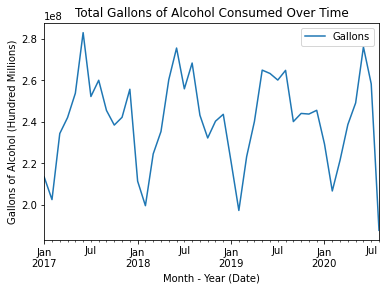

In [18]:
#Plot gallons of alcohol over time for all states
total_alcohol_gallons_over_time_by_date.plot.line( y='Gallons', title="Total Gallons of Alcohol Consumed Over Time")
plt.ylabel('Gallons of Alcohol (Hundred Millions)')

#Save figure to folder
plt.savefig("allstates_alcohol_consumption.png")

# QC - Need to clean the data to remove any states that did not have data for all dates

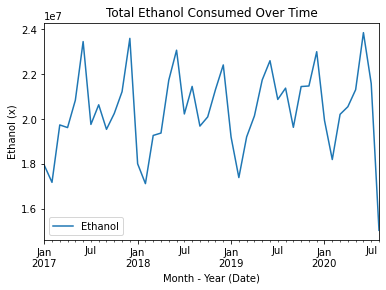

In [20]:
#Plot total ethanol over time for all states
total_alcohol_gallons_over_time_by_date.plot.line( y='Ethanol', title="Total Ethanol Consumed Over Time")
plt.ylabel('Ethanol (x)')

#Save figure to folder
plt.savefig("allstates_ethanol_consumption.png")

# QC - Need to clean the data to remove any states that did not have data for all dates

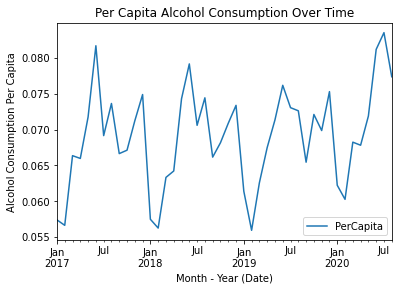

In [21]:
#Plot avg. per capita over time for all states
total_alcohol_gallons_over_time_by_date.plot.line( y='PerCapita', title="Per Capita Alcohol Consumption Over Time")
plt.ylabel('Alcohol Consumption Per Capita')

#Save figure to folder
plt.savefig("allstates_percapita_consumption.png")

# QC - Need to clean the data to remove any states that did not have data for all dates

# Run TTest Across Years

## <span style="color:red"> TTEST FOR ALL MONTHS NOT GIVING GREAT RESULT</span>

In [123]:
# Calculate the gallons mean for all states for year 2020
year_2020 = alcohol_sales_data[alcohol_sales_data["Year"] == 2020]
year_2020.PerCapita.mean()

0.07111653944020364

In [124]:
# Calculate the gallons mean for all states for year 2019
year_2019_2018_2017 = alcohol_sales_data[(alcohol_sales_data["Year"] == 2019) | (alcohol_sales_data["Year"] == 2018) | (alcohol_sales_data["Year"] == 2017)]
year_2019_2018_2017.PerCapita.mean()

0.06844738247863243

In [126]:
# Calculate Independent (Two Sample) t-test
stats.ttest_ind(year_2020.PerCapita, year_2019_2018_2017.PerCapita, equal_var=False)

Ttest_indResult(statistic=1.4174576422248202, pvalue=0.15692431237522786)

## <span style="color:red"> RERUNNING TTEST FOR ONLY MONTHS 1 - 7 </span>

In [114]:
#Clean data for limited number of months available for all years
cleaned_alcohol_data_copy = alcohol_sales_data.loc[(alcohol_sales_data["Month"] ==1) | (alcohol_sales_data["Month"] == 2) | (alcohol_sales_data["Month"] == 3)
                                      | (alcohol_sales_data["Month"] == 4) | (alcohol_sales_data["Month"] == 5) |
                                               (alcohol_sales_data["Month"] == 5) | (alcohol_sales_data["Month"] == 6)
                                               | (alcohol_sales_data["Month"] ==7)].copy()

In [127]:
# Calculate the gallons mean for all states for year 2020 v2
year_2020_v2 = cleaned_alcohol_data_copy[cleaned_alcohol_data_copy["Year"] == 2020]
year_2020_v2.PerCapita.mean()

0.07048571428571437

In [128]:
# Calculate the gallons mean for all states for year 2019 v2
year_2019_2018_2017_v2 = cleaned_alcohol_data_copy[(cleaned_alcohol_data_copy["Year"] == 2019) | (cleaned_alcohol_data_copy["Year"] == 2018) | (cleaned_alcohol_data_copy["Year"] == 2017)]
year_2019_2018_2017_v2.PerCapita.mean()

0.06677353479853486

In [129]:
# Calculate Independent (Two Sample) t-test
stats.ttest_ind(year_2020_v2.PerCapita, year_2019_2018_2017_v2.PerCapita, equal_var=False)

Ttest_indResult(statistic=1.8113690688236297, pvalue=0.07061109506673731)

# State by State Breakdown of Data

In [27]:
# Set groupby by State
state_alcohol_sales_groupby = alcohol_sales_data.groupby(['State'])

# Find count of data point per state
count_per_state = state_alcohol_sales_groupby.size()

# Find total gallons of ethanol per state
total_gallons_per_state = state_alcohol_sales_groupby["Gallons"].sum()

# Find total ethanol per state
total_ethanol_per_state = state_alcohol_sales_groupby["Ethanol"].sum()

#Find average population per state
total_population_per_state = state_alcohol_sales_groupby["Population"].median()

#Find per capita alcohol consumption per state
per_capita_per_state = state_alcohol_sales_groupby["PerCapita"].mean()

#Add state by state breakdown to dataframe
grouped_state_df = pd.DataFrame({
    "Count": count_per_state,
    "Gallons": total_ethanol_per_state,
    "Ethanol": total_ethanol_per_state,
    "Total Population": total_population_per_state,
    "Avg PerCapita": per_capita_per_state
})


#Save to CSV
grouped_state_df.to_csv(r'grouped_state_df.csv', index = True)

In [28]:
#Show dataframe
grouped_state_df.head()

,Count,Gallons,Ethanol,Total Population,Avg PerCapita
State,,,,,
Alaska,132,6165264,6165264,590760,0.079049
Arkansas,132,16429378,16429378,2465297,0.050443
Colorado,132,49557495,49557495,4715895,0.079425
Connecticut,129,26302609,26302609,3019150,0.067557
Delaware,129,10447503,10447503,808146,0.100049


# Individual State Analyses

## <span style="color:red"> FIND A WAY TO MAKE THIS RUN IN A FOR LOOP</span>

In [38]:
#Filter for Alaska ONLY
alaska_df = alcohol_sales_data.loc[alcohol_sales_data["State"] == 'Alaska']

# Groupby Data Frame by Date
alaska_by_year = alaska_df.groupby(['Month - Year (Date)'])

# Find sum of gallons
alaska_total_gallons = alaska_by_year["Gallons"].sum()

# Find sum of ethanol
alaska_total_ethanol = alaska_by_year["Ethanol"].sum()

# Find average of population
alaska_avg_pop = alaska_by_year["Population"].mean()

# Find average pc
alaska_avg_pc = alaska_by_year["PerCapita"].mean()

cleaned_alaska_df = pd.DataFrame({
    "Gallons": alaska_total_gallons,
    "Ethanol": alaska_total_ethanol,
    "Population": alaska_avg_pop,
    "PerCapita": alaska_avg_pc
    
})

cleaned_alaska_df.head()

,Gallons,Ethanol,Population,PerCapita
Month - Year (Date),,,,
2017-01-01,1031551,96155,593378,0.054000
2017-02-01,1129711,108795,593378,0.061133
2017-03-01,1453069,134456,593378,0.075533
2017-04-01,1367197,123712,593378,0.069500
2017-05-01,1841678,159711,593378,0.089733


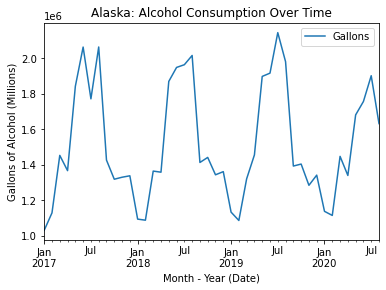

In [35]:
#Plot Alaska Alcohol Gallons Over Time
cleaned_alaska_df.plot.line( y='Gallons', title="Alaska: Alcohol Consumption Over Time")
plt.ylabel('Gallons of Alcohol (Millions)')

#Save Figure to PNG
plt.savefig("alaska_alcohol_consumption.png")


In [39]:
#Arkansas only
arkansas_df = alcohol_sales_data.loc[alcohol_sales_data["State"] == 'Arkansas']

#Groupby year
arkansas_by_year = arkansas_df.groupby(['Month - Year (Date)'])

# Find sum of gallons
arkansas_total_gallons = arkansas_by_year["Gallons"].sum()

# Find sum of ethanol
arkansas_total_ethanol = arkansas_by_year["Ethanol"].sum()

arkansas_avg_pop = arkansas_by_year["Population"].mean()

# Find average pc
arkansas_avg_pc = arkansas_by_year["PerCapita"].mean()

cleaned_arkansas_df = pd.DataFrame({
    "Gallons": arkansas_total_gallons,
    "Ethanol": arkansas_total_ethanol,
    "Population": arkansas_avg_pop,
    "PerCapita": arkansas_avg_pc
    
})

cleaned_arkansas_df.head()

,Gallons,Ethanol,Population,PerCapita
Month - Year (Date),,,,
2017-01-01,4254529,376831,2455022,0.051133
2017-02-01,4095944,304688,2455022,0.041367
2017-03-01,4362869,327557,2455022,0.044467
2017-04-01,4801439,366677,2455022,0.049800
2017-05-01,5001547,358703,2455022,0.048700


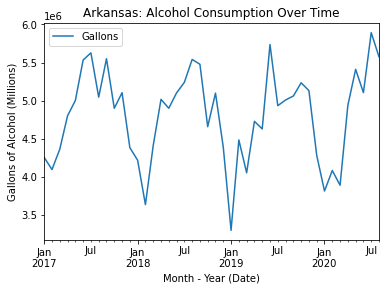

In [49]:
#Plot Arkansas
cleaned_arkansas_df.plot.line( y='Gallons', title="Arkansas: Alcohol Consumption Over Time")
plt.ylabel('Gallons of Alcohol (Millions)')

#Save figure to PNG
plt.savefig("arkansas_alcohol_consumption.png")


In [42]:
#Colorado only
colorado_df = alcohol_sales_data.loc[alcohol_sales_data["State"] == 'Colorado']

#Groupby year
colorado_by_year = colorado_df.groupby(['Month - Year (Date)'])

# Find sum of gallons
colorado_total_gallons = colorado_by_year["Gallons"].sum()

# Find sum of ethanol
colorado_total_ethanol = colorado_by_year["Ethanol"].sum()

colorado_avg_pop = colorado_by_year["Population"].mean()

# Find average pc
colorado_avg_pc = colorado_by_year["PerCapita"].mean()

cleaned_colorado_df = pd.DataFrame({
    "Gallons": colorado_total_gallons,
    "Ethanol": colorado_total_ethanol,
    "Population": colorado_avg_pop,
    "PerCapita": colorado_avg_pc
    
})

cleaned_colorado_df.head()

,Gallons,Ethanol,Population,PerCapita
Month - Year (Date),,,,
2017-01-01,10061858,817722,4634346,0.058800
2017-02-01,10381811,931925,4634346,0.067033
2017-03-01,12518995,1113251,4634346,0.080067
2017-04-01,11271388,968862,4634346,0.069700
2017-05-01,13389596,1161497,4634346,0.083533


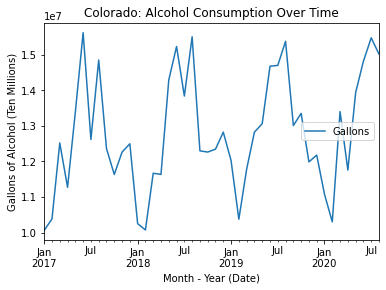

In [50]:
#Plot Colorado
cleaned_colorado_df.plot.line( y='Gallons', title="Colorado: Alcohol Consumption Over Time")
plt.ylabel('Gallons of Alcohol (Ten Millions)')

#Save figure to PNG
plt.savefig("colorado_alcohol_consumption.png")


In [45]:
#Connecticut only
connecticut_df = alcohol_sales_data.loc[alcohol_sales_data["State"] == 'Connecticut']

#Groupby year
connecticut_by_year = connecticut_df.groupby(['Month - Year (Date)'])

# Find sum of gallons
connecticut_total_gallons = connecticut_by_year["Gallons"].sum()

# Find sum of ethanol
connecticut_total_ethanol = connecticut_by_year["Ethanol"].sum()

connecticut_avg_pop = connecticut_by_year["Population"].mean()

# Find average pc
connecticut_avg_pc = connecticut_by_year["PerCapita"].mean()

cleaned_connecticut_df = pd.DataFrame({
    "Gallons": connecticut_total_gallons,
    "Ethanol": connecticut_total_ethanol,
    "Population": connecticut_avg_pop,
    "PerCapita": connecticut_avg_pc
    
})

cleaned_connecticut_df.head()

,Gallons,Ethanol,Population,PerCapita
Month - Year (Date),,,,
2017-01-01,4656852,427144,3015481,0.047233
2017-02-01,5160850,529699,3015481,0.058567
2017-03-01,6172341,599589,3015481,0.066267
2017-04-01,5930047,550922,3015481,0.060900
2017-05-01,7045182,653994,3015481,0.072300


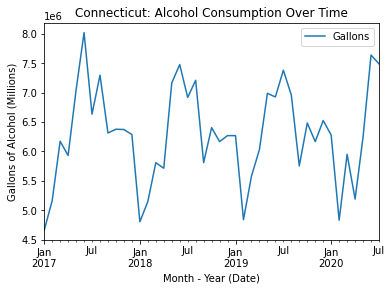

In [51]:
#Plot Connecticut
cleaned_connecticut_df.plot.line( y='Gallons', title="Connecticut: Alcohol Consumption Over Time")
plt.ylabel('Gallons of Alcohol (Millions)')

#Save figure to PNG
plt.savefig("connecticut_alcohol_consumption.png")

In [47]:
#Delaware only
delaware_df = alcohol_sales_data.loc[alcohol_sales_data["State"] == 'Delaware']

#Groupby year
delaware_by_year = delaware_df.groupby(['Month - Year (Date)'])

# Find sum of gallons
delaware_total_gallons = delaware_by_year["Gallons"].sum()

# Find sum of ethanol
delaware_total_ethanol = delaware_by_year["Ethanol"].sum()

delaware_avg_pop = delaware_by_year["Population"].mean()

# Find average pc
delaware_avg_pc = delaware_by_year["PerCapita"].mean()

cleaned_delaware_df = pd.DataFrame({
    "Gallons": delaware_total_gallons,
    "Ethanol": delaware_total_ethanol,
    "Population": delaware_avg_pop,
    "PerCapita": delaware_avg_pc
    
})

cleaned_delaware_df.head()

,Gallons,Ethanol,Population,PerCapita
Month - Year (Date),,,,
2017-01-01,1586481,158737,799550,0.066167
2017-02-01,1886984,194929,799550,0.081300
2017-03-01,2213972,232172,799550,0.096767
2017-04-01,2052643,218240,799550,0.090967
2017-05-01,2822911,278303,799550,0.116033


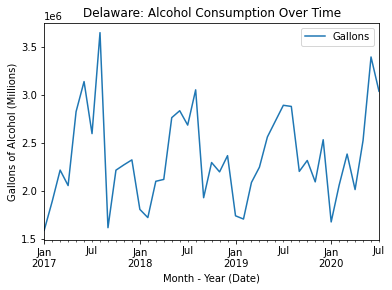

In [55]:
#Plot Delaware
cleaned_delaware_df.plot.line( y='Gallons', title="Delaware: Alcohol Consumption Over Time")
plt.ylabel('Gallons of Alcohol (Millions)')

#Save figure to PNG
plt.savefig("delaware_alcohol_consumption.png")

In [53]:
#Florida only
florida_df = alcohol_sales_data.loc[alcohol_sales_data["State"] == 'Florida']

#Groupby year
florida_by_year = florida_df.groupby(['Month - Year (Date)'])

# Find sum of gallons
florida_total_gallons = florida_by_year["Gallons"].sum()

# Find sum of ethanol
florida_total_ethanol = florida_by_year["Ethanol"].sum()

florida_avg_pop = florida_by_year["Population"].mean()

# Find average pc
florida_avg_pc = florida_by_year["PerCapita"].mean()

cleaned_florida_df = pd.DataFrame({
    "Gallons": florida_total_gallons,
    "Ethanol": florida_total_ethanol,
    "Population": florida_avg_pop,
    "PerCapita": florida_avg_pc
    
})

cleaned_florida_df.head()

,Gallons,Ethanol,Population,PerCapita
Month - Year (Date),,,,
2017-01-01,38978412,3271041,17722275,0.061533
2017-02-01,41846274,3697778,17722275,0.069567
2017-03-01,52218721,4529317,17722275,0.085200
2017-04-01,45390404,3753910,17722275,0.070633
2017-05-01,48477676,4126105,17722275,0.077600


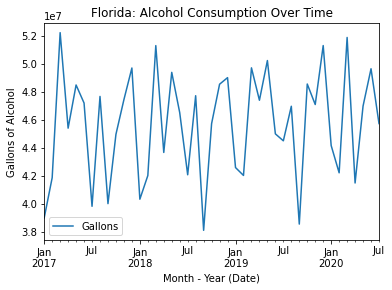

In [56]:
#Plot Florida
cleaned_florida_df.plot.line( y='Gallons', title="Florida: Alcohol Consumption Over Time")
plt.ylabel('Gallons of Alcohol')

#Save figure to PNG
plt.savefig("florida_alcohol_consumption.png")

In [57]:
#Illinois only
illinois_df = alcohol_sales_data.loc[alcohol_sales_data["State"] == 'Illinois']

#Groupby year
illinois_by_year = illinois_df.groupby(['Month - Year (Date)'])

# Find sum of gallons
illinois_total_gallons = illinois_by_year["Gallons"].sum()

# Find sum of ethanol
illinois_total_ethanol = illinois_by_year["Ethanol"].sum()

illinois_avg_pop = illinois_by_year["Population"].mean()

# Find average pc
illinois_avg_pc = illinois_by_year["PerCapita"].mean()

cleaned_illinois_df = pd.DataFrame({
    "Gallons": illinois_total_gallons,
    "Ethanol": illinois_total_ethanol,
    "Population": illinois_avg_pop,
    "PerCapita": illinois_avg_pc
    
})

cleaned_illinois_df.head()

,Gallons,Ethanol,Population,PerCapita
Month - Year (Date),,,,
2017-01-01,19081361,1418571,10556100,0.044800
2017-02-01,20807828,1673039,10556100,0.052833
2017-03-01,25807148,2060693,10556100,0.065100
2017-04-01,24512795,1873737,10556100,0.059200
2017-05-01,30371041,2383409,10556100,0.075233


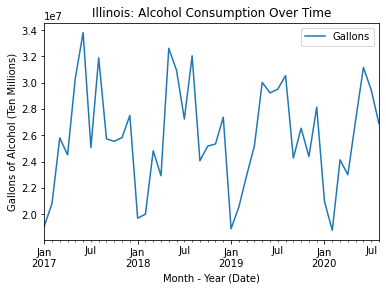

In [59]:
#Plot Illinois
cleaned_illinois_df.plot.line( y='Gallons', title="Illinois: Alcohol Consumption Over Time")
plt.ylabel('Gallons of Alcohol (Ten Millions)')
plt.savefig("illinois_alcohol_consumption.png")


In [60]:
#Kansas only
kansas_df = alcohol_sales_data.loc[alcohol_sales_data["State"] == 'Kansas']

#Groupby year
kansas_by_year = kansas_df.groupby(['Month - Year (Date)'])

# Find sum of gallons
kansas_total_gallons = kansas_by_year["Gallons"].sum()

# Find sum of ethanol
kansas_total_ethanol = kansas_by_year["Ethanol"].sum()

kansas_avg_pop = kansas_by_year["Population"].mean()

# Find average pc
kansas_avg_pc = kansas_by_year["PerCapita"].mean()

cleaned_kansas_df = pd.DataFrame({
    "Gallons": illinois_total_gallons,
    "Ethanol": illinois_total_ethanol,
    "Population": illinois_avg_pop,
    "PerCapita": illinois_avg_pc
    
})

cleaned_kansas_df.head()

,Gallons,Ethanol,Population,PerCapita
Month - Year (Date),,,,
2017-01-01,19081361,1418571,10556100,0.044800
2017-02-01,20807828,1673039,10556100,0.052833
2017-03-01,25807148,2060693,10556100,0.065100
2017-04-01,24512795,1873737,10556100,0.059200
2017-05-01,30371041,2383409,10556100,0.075233


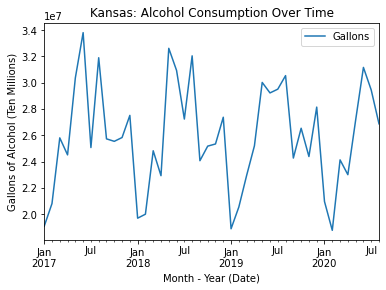

In [62]:
#Plot Kansas
cleaned_kansas_df.plot.line( y='Gallons', title="Kansas: Alcohol Consumption Over Time")
plt.ylabel('Gallons of Alcohol (Ten Millions)')

#Save figure to PNG
plt.savefig("kansas_alcohol_consumption.png")


In [63]:
#Kentucky only
kentucky_df = alcohol_sales_data.loc[alcohol_sales_data["State"] == 'Kentucky']

#Groupby year
kentucky_by_year = kentucky_df.groupby(['Month - Year (Date)'])

# Find sum of gallons
kentucky_total_gallons = kentucky_by_year["Gallons"].sum()

# Find sum of ethanol
kentucky_total_ethanol = kentucky_by_year["Ethanol"].sum()

kentucky_avg_pop = kentucky_by_year["Population"].mean()

# Find average pc
kentucky_avg_pc = kentucky_by_year["PerCapita"].mean()

cleaned_kentucky_df = pd.DataFrame({
    "Gallons": kentucky_total_gallons,
    "Ethanol": kentucky_total_ethanol,
    "Population": kentucky_avg_pop,
    "PerCapita": kentucky_avg_pc
    
})

cleaned_kentucky_df.head()

,Gallons,Ethanol,Population,PerCapita
Month - Year (Date),,,,
2017-01-01,7475242,683424,3670568,0.062067
2017-02-01,5040964,343614,3670568,0.031200
2017-03-01,7287808,604146,3670568,0.054900
2017-04-01,7844952,628180,3670568,0.057033
2017-05-01,7054059,569145,3670568,0.051700


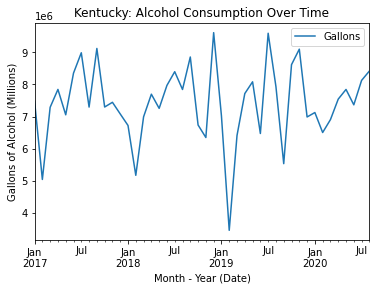

In [65]:
#Plot Kentucky
cleaned_kentucky_df.plot.line( y='Gallons', title="Kentucky: Alcohol Consumption Over Time")
plt.ylabel('Gallons of Alcohol (Millions)')

#Save figure to PNG
plt.savefig("kentucky_alcohol_consumption.png")


In [66]:
#Louisiana only
louisiana_df = alcohol_sales_data.loc[alcohol_sales_data["State"] == 'Louisiana']

#Groupby year
louisiana_by_year = louisiana_df.groupby(['Month - Year (Date)'])

# Find sum of gallons
louisiana_total_gallons = louisiana_by_year["Gallons"].sum()

# Find sum of ethanol
louisiana_total_ethanol = louisiana_by_year["Ethanol"].sum()

louisiana_avg_pop = louisiana_by_year["Population"].mean()

# Find average pc
louisiana_avg_pc = louisiana_by_year["PerCapita"].mean()

cleaned_louisiana_df = pd.DataFrame({
    "Gallons": louisiana_total_gallons,
    "Ethanol": louisiana_total_ethanol,
    "Population": louisiana_avg_pop,
    "PerCapita": louisiana_avg_pc
    
})

cleaned_louisiana_df.head()

,Gallons,Ethanol,Population,PerCapita
Month - Year (Date),,,,
2017-01-01,1324846,349443,3807282,0.04585
2017-02-01,1418069,380419,3807282,0.04995
2017-03-01,1663745,444203,3807282,0.05835
2017-04-01,1493095,398424,3807282,0.05235
2017-05-01,1626509,435335,3807282,0.05715


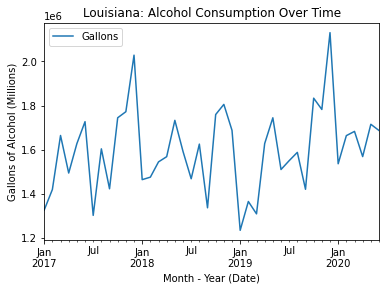

In [91]:
#Plot Louisiana
cleaned_louisiana_df.plot.line( y='Gallons', title="Louisiana: Alcohol Consumption Over Time")
plt.ylabel('Gallons of Alcohol (Millions)')

#Save figure to PNG
plt.savefig("louisiana_alcohol_consumption.png")


In [68]:
#Massachusetts only
massachusetts_df = alcohol_sales_data.loc[alcohol_sales_data["State"] == 'Massachusetts']

#Groupby year
massachusetts_by_year = massachusetts_df.groupby(['Month - Year (Date)'])

# Find sum of gallons
massachusetts_total_gallons = massachusetts_by_year["Gallons"].sum()

# Find sum of ethanol
massachusetts_total_ethanol = massachusetts_by_year["Ethanol"].sum()

massachusetts_avg_pop = massachusetts_by_year["Population"].mean()

# Find average pc
massachusetts_avg_pc = massachusetts_by_year["PerCapita"].mean()

cleaned_massachusetts_df = pd.DataFrame({
    "Gallons": massachusetts_total_gallons,
    "Ethanol": massachusetts_total_ethanol,
    "Population": massachusetts_avg_pop,
    "PerCapita": massachusetts_avg_pc
    
})

cleaned_massachusetts_df.head()

,Gallons,Ethanol,Population,PerCapita
Month - Year (Date),,,,
2017-01-01,10048538,755332,5815595,0.043300
2017-02-01,10584705,938637,5815595,0.053767
2017-03-01,14402964,1320627,5815595,0.075700
2017-04-01,13518116,1172739,5815595,0.067233
2017-05-01,15961398,1395388,5815595,0.079967


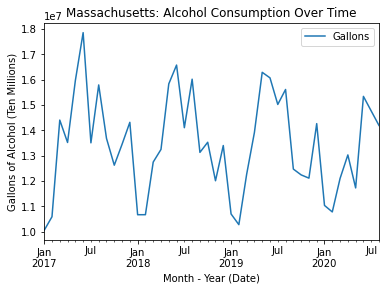

In [90]:
#Plot Massachusetts
cleaned_massachusetts_df.plot.line( y='Gallons', title="Massachusetts: Alcohol Consumption Over Time")
plt.ylabel('Gallons of Alcohol (Ten Millions)')

#Save figure to PNG
plt.savefig("massachusetts_alcohol_consumption.png")


In [70]:
#Missouri only
missouri_df = alcohol_sales_data.loc[alcohol_sales_data["State"] == 'Missouri']

#Groupby year
missouri_by_year = missouri_df.groupby(['Month - Year (Date)'])

# Find sum of gallons
missouri_total_gallons = missouri_by_year["Gallons"].sum()

# Find sum of ethanol
missouri_total_ethanol = missouri_by_year["Ethanol"].sum()

missouri_avg_pop = missouri_by_year["Population"].mean()

# Find average pc
missouri_avg_pc = missouri_by_year["PerCapita"].mean()

cleaned_missouri_df = pd.DataFrame({
    "Gallons": missouri_total_gallons,
    "Ethanol": missouri_total_ethanol,
    "Population": missouri_avg_pop,
    "PerCapita": missouri_avg_pc
    
})

cleaned_missouri_df.head()

,Gallons,Ethanol,Population,PerCapita
Month - Year (Date),,,,
2017-01-01,11080651,812306,5037634,0.053733
2017-02-01,11278507,967676,5037634,0.064033
2017-03-01,13527957,1110946,5037634,0.073500
2017-04-01,12951436,1031270,5037634,0.068267
2017-05-01,14416484,1146884,5037634,0.075867


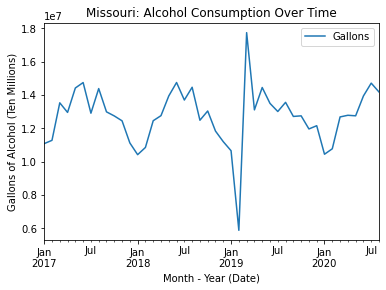

In [89]:
#Plot Missouri
cleaned_missouri_df.plot.line( y='Gallons', title="Missouri: Alcohol Consumption Over Time")
plt.ylabel('Gallons of Alcohol (Ten Millions)')

#Save figure to PNG
plt.savefig("missouri_alcohol_consumption.png")

#Dip in Jan 2019 may be attributed to missing data??

In [74]:
#North Dakota only
northdakota_df = alcohol_sales_data.loc[alcohol_sales_data["State"] == 'North Dakota']

#Groupby year
northdakota_by_year = northdakota_df.groupby(['Month - Year (Date)'])

# Find sum of gallons
northdakota_total_gallons = northdakota_by_year["Gallons"].sum()

# Find sum of ethanol
northdakota_total_ethanol = northdakota_by_year["Ethanol"].sum()

northdakota_avg_pop = northdakota_by_year["Population"].mean()

# Find average pc
northdakota_avg_pc = northdakota_by_year["PerCapita"].mean()

cleaned_northdakota_df = pd.DataFrame({
    "Gallons": northdakota_total_gallons,
    "Ethanol": northdakota_total_ethanol,
    "Population": northdakota_avg_pop,
    "PerCapita": northdakota_avg_pc
    
})

cleaned_northdakota_df.head()

,Gallons,Ethanol,Population,PerCapita
Month - Year (Date),,,,
2017-01-01,1700759,130006,613251,0.070667
2017-02-01,1739173,137387,613251,0.074667
2017-03-01,1886332,154797,613251,0.084133
2017-04-01,2229208,163044,613251,0.088600
2017-05-01,2415997,184089,613251,0.100067


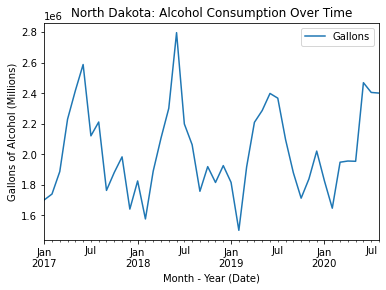

In [88]:
#Plot North Dakota
cleaned_northdakota_df.plot.line( y='Gallons', title="North Dakota: Alcohol Consumption Over Time")
plt.ylabel('Gallons of Alcohol (Millions)')

#Save figure to PNG
plt.savefig("northdakota_alcohol_consumption.png")

In [76]:
#Oregon only
oregon_df = alcohol_sales_data.loc[alcohol_sales_data["State"] == 'Oregon']

#Groupby year
oregon_by_year = oregon_df.groupby(['Month - Year (Date)'])

# Find sum of gallons
oregon_total_gallons = oregon_by_year["Gallons"].sum()

# Find sum of ethanol
oregon_total_ethanol = oregon_by_year["Ethanol"].sum()

oregon_avg_pop = oregon_by_year["Population"].mean()

# Find average pc
oregon_avg_pc = oregon_by_year["PerCapita"].mean()

cleaned_oregon_df = pd.DataFrame({
    "Gallons": oregon_total_gallons,
    "Ethanol": oregon_total_ethanol,
    "Population": oregon_avg_pop,
    "PerCapita": oregon_avg_pc
    
})

cleaned_oregon_df.head()

,Gallons,Ethanol,Population,PerCapita
Month - Year (Date),,,,
2017-01-01,7550045,463761,3468412,0.06685
2017-02-01,7647034,435315,3468412,0.06275
2017-03-01,8286291,480837,3468412,0.06930
2017-04-01,10407890,590894,3468412,0.08520
2017-05-01,8320421,468002,3468412,0.06745


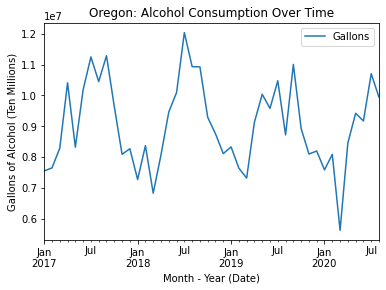

In [87]:
#Plot Oregon
cleaned_oregon_df.plot.line( y='Gallons', title="Oregon: Alcohol Consumption Over Time")
plt.ylabel('Gallons of Alcohol (Ten Millions)')

# Save figure to PNG
plt.savefig("oregon_alcohol_consumption.png")

In [79]:
#Tennessee only
tennessee_df = alcohol_sales_data.loc[alcohol_sales_data["State"] == 'Tennessee']

#Groupby year
tennessee_by_year = tennessee_df.groupby(['Month - Year (Date)'])

# Find sum of gallons
tennessee_total_gallons = tennessee_by_year["Gallons"].sum()

# Find sum of ethanol
tennessee_total_ethanol = tennessee_by_year["Ethanol"].sum()

tennessee_avg_pop = tennessee_by_year["Population"].mean()

# Find average pc
tennessee_avg_pc = tennessee_by_year["PerCapita"].mean()

cleaned_tennessee_df = pd.DataFrame({
    "Gallons": tennessee_total_gallons,
    "Ethanol": tennessee_total_ethanol,
    "Population": tennessee_avg_pop,
    "PerCapita": tennessee_avg_pc
    
})

cleaned_tennessee_df.head()

,Gallons,Ethanol,Population,PerCapita
Month - Year (Date),,,,
2017-01-01,11092557,1083160,5545920,0.065067
2017-02-01,11341386,833638,5545920,0.050133
2017-03-01,10217791,819927,5545920,0.049267
2017-04-01,10873360,919559,5545920,0.055267
2017-05-01,12457594,962329,5545920,0.057833


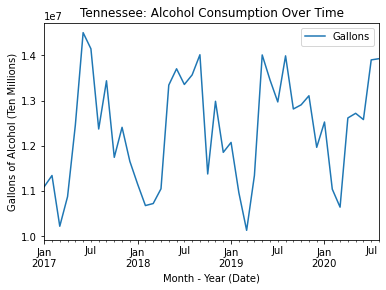

In [86]:
#Plot Tennessee
cleaned_tennessee_df.plot.line( y='Gallons', title="Tennessee: Alcohol Consumption Over Time")
plt.ylabel('Gallons of Alcohol (Ten Millions)')

#Save figure to PNG
plt.savefig("tennessee_alcohol_consumption.png")

In [81]:
#Texas only
texas_df = alcohol_sales_data.loc[alcohol_sales_data["State"] == 'Texas']

#Groupby year
texas_by_year = texas_df.groupby(['Month - Year (Date)'])

# Find sum of gallons
texas_total_gallons = texas_by_year["Gallons"].sum()

# Find sum of ethanol
texas_total_ethanol = texas_by_year["Ethanol"].sum()

texas_avg_pop = texas_by_year["Population"].mean()

# Find average pc
texas_avg_pc = texas_by_year["PerCapita"].mean()

cleaned_texas_df = pd.DataFrame({
    "Gallons": texas_total_gallons,
    "Ethanol": texas_total_ethanol,
    "Population": texas_avg_pop,
    "PerCapita": texas_avg_pc
    
})

cleaned_texas_df.head()

,Gallons,Ethanol,Population,PerCapita
Month - Year (Date),,,,
2017-01-01,62772657,4846257,22572383,0.071567
2017-02-01,48611261,3722639,22572383,0.054967
2017-03-01,50096496,3595839,22572383,0.053100
2017-04-01,64077392,4440240,22572383,0.065567
2017-05-01,57390914,4160218,22572383,0.061433


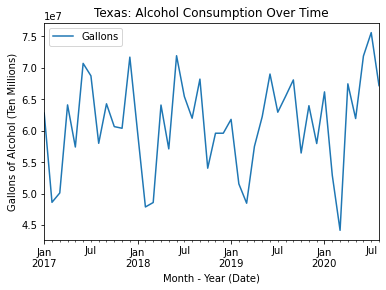

In [85]:
#Plot Texas
cleaned_texas_df.plot.line( y='Gallons', title="Texas: Alcohol Consumption Over Time")
plt.ylabel('Gallons of Alcohol (Ten Millions)')

#Save figure to PNG
plt.savefig("texas_alcohol_consumption.png")

In [83]:
#Utah only
utah_df = alcohol_sales_data.loc[alcohol_sales_data["State"] == 'Utah']

#Groupby year
utah_by_year = utah_df.groupby(['Month - Year (Date)'])

# Find sum of gallons
utah_total_gallons = utah_by_year["Gallons"].sum()

# Find sum of ethanol
utah_total_ethanol = utah_by_year["Ethanol"].sum()

utah_avg_pop = utah_by_year["Population"].mean()

# Find average pc
utah_avg_pc = utah_by_year["PerCapita"].mean()

cleaned_utah_df = pd.DataFrame({
    "Gallons": utah_total_gallons,
    "Ethanol": utah_total_ethanol,
    "Population": utah_avg_pop,
    "PerCapita": utah_avg_pc
    
})

cleaned_utah_df.head()

,Gallons,Ethanol,Population,PerCapita
Month - Year (Date),,,,
2017-01-01,543896,143172,2376114,0.03015
2017-02-01,498978,130594,2376114,0.02745
2017-03-01,616653,161630,2376114,0.03400
2017-04-01,500667,129956,2376114,0.02735
2017-05-01,539375,138741,2376114,0.02920


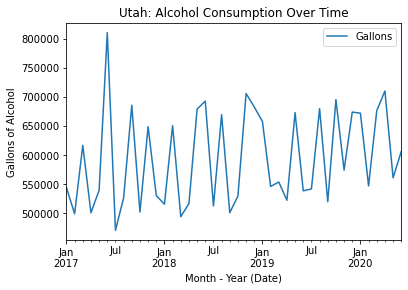

In [84]:
#Plot Utah
cleaned_utah_df.plot.line( y='Gallons', title="Utah: Alcohol Consumption Over Time")
plt.ylabel('Gallons of Alcohol')

#Save figure to PNG
plt.savefig("utah_alcohol_consumption.png")

In [92]:
#Virginia only
virginia_df = alcohol_sales_data.loc[alcohol_sales_data["State"] == 'Virginia']

#Groupby year
virginia_by_year = virginia_df.groupby(['Month - Year (Date)'])

# Find sum of gallons
virginia_total_gallons = virginia_by_year["Gallons"].sum()

# Find sum of ethanol
virginia_total_ethanol = virginia_by_year["Ethanol"].sum()

virginia_avg_pop = virginia_by_year["Population"].mean()

# Find average pc
virginia_avg_pc = virginia_by_year["PerCapita"].mean()

cleaned_virginia_df = pd.DataFrame({
    "Gallons": virginia_total_gallons,
    "Ethanol": virginia_total_ethanol,
    "Population": virginia_avg_pop,
    "PerCapita": virginia_avg_pc
    
})

cleaned_virginia_df.head()

,Gallons,Ethanol,Population,PerCapita
Month - Year (Date),,,,
2017-01-01,12959967,1036787,7015247,0.049267
2017-02-01,12995750,1048658,7015247,0.049833
2017-03-01,15428824,1225027,7015247,0.058233
2017-04-01,14883129,1171129,7015247,0.055667
2017-05-01,17868855,1352211,7015247,0.064267


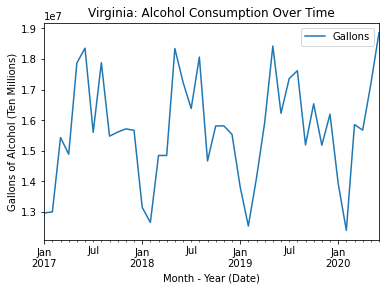

In [94]:
#Plot Virginia
cleaned_virginia_df.plot.line( y='Gallons', title="Virginia: Alcohol Consumption Over Time")
plt.ylabel('Gallons of Alcohol (Ten Millions)')

#Save figure to PNG
plt.savefig("virginia_alcohol_consumption.png")

In [95]:
#Wisconsic only
wisconsin_df = alcohol_sales_data.loc[alcohol_sales_data["State"] == 'Wisconsin']

#Groupby year
wisconsin_by_year = wisconsin_df.groupby(['Month - Year (Date)'])

# Find sum of gallons
wisconsin_total_gallons = wisconsin_by_year["Gallons"].sum()

# Find sum of ethanol
wisconsin_total_ethanol = wisconsin_by_year["Ethanol"].sum()

wisconsin_avg_pop = wisconsin_by_year["Population"].mean()

# Find average pc
wisconsin_avg_pc = wisconsin_by_year["PerCapita"].mean()

cleaned_wisconsin_df = pd.DataFrame({
    "Gallons": wisconsin_total_gallons,
    "Ethanol": wisconsin_total_ethanol,
    "Population": wisconsin_avg_pop,
    "PerCapita": wisconsin_avg_pc
    
})

cleaned_wisconsin_df.head()

,Gallons,Ethanol,Population,PerCapita
Month - Year (Date),,,,
2017-01-01,2664892,735108,4805415,0.0765
2017-02-01,1895748,495250,4805415,0.0515
2017-03-01,1941876,509778,4805415,0.0530
2017-04-01,2707841,743664,4805415,0.0774
2017-05-01,2145225,577700,4805415,0.0601


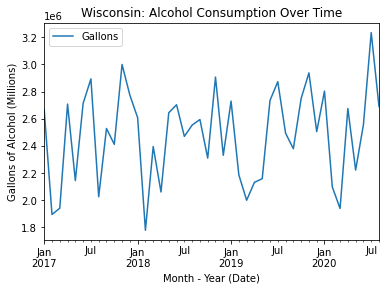

In [97]:
#Plot Wisconsin
cleaned_wisconsin_df.plot.line( y='Gallons', title="Wisconsin: Alcohol Consumption Over Time")
plt.ylabel('Gallons of Alcohol (Millions)')

#Save figure to PNG
plt.savefig("wisconsin_alcohol_consumption.png")

# Seasonal Comparison of Alcohol Consumption Over Years

In [131]:
#Set figure size & dpi
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

# Import Data
df = pd.read_csv('Data/alcsales_August2020_codedfullfile_2.csv', parse_dates=['Month - Year (Date)'], index_col='Month - Year (Date)')
df.reset_index(inplace=True)

updated_df = df.rename(columns={"Month - Year (Date)": "date"})
# Prepare data
updated_df['Year'] = [d.year for d in updated_df.date]
updated_df['Month.1'] = [d.strftime('%b') for d in updated_df.date]
years = updated_df['Year'].unique()
month_names = updated_df["Month.1"].unique()

# Limit the dataset to months where we have observations for 2020 (ie Jan - Aug)
updated_df = updated_df.loc[updated_df.Month < 8].copy()

updated_df.head()

,date,Year,Month,FIPS,Beverage,Gallons,Ethanol,Population,PerCapita,State,Month.1,Month - Year (Word),Month - Year (Numeric)
0,2017-01-01,2017,1,2,1,103645,42598,593378,0.0718,Alaska,Jan,January 2017,1 2017
1,2017-01-01,2017,1,5,1,402885,165586,2455022,0.0674,Arkansas,Jan,January 2017,1 2017
2,2017-01-01,2017,1,8,1,733857,301615,4634346,0.0651,Colorado,Jan,January 2017,1 2017
3,2017-01-01,2017,1,9,1,412100,169373,3015481,0.0562,Connecticut,Jan,January 2017,1 2017
4,2017-01-01,2017,1,10,1,180388,74139,799550,0.0927,Delaware,Jan,January 2017,1 2017


In [133]:
#Run national groupby & agg
national_groupby = updated_df.groupby(['Year', 'Month']).aggregate({"Gallons": 'sum', "Month.1":'first','PerCapita':'sum'}).reset_index()
national_groupby.head()

,Year,Month,Gallons,Month.1,PerCapita
0,2017,1,213428134,Jan,2.9843
1,2017,2,202554024,Feb,2.9446
2,2017,3,234341479,Mar,3.4505
3,2017,4,242022452,Apr,3.4304
4,2017,5,253716538,May,3.7315


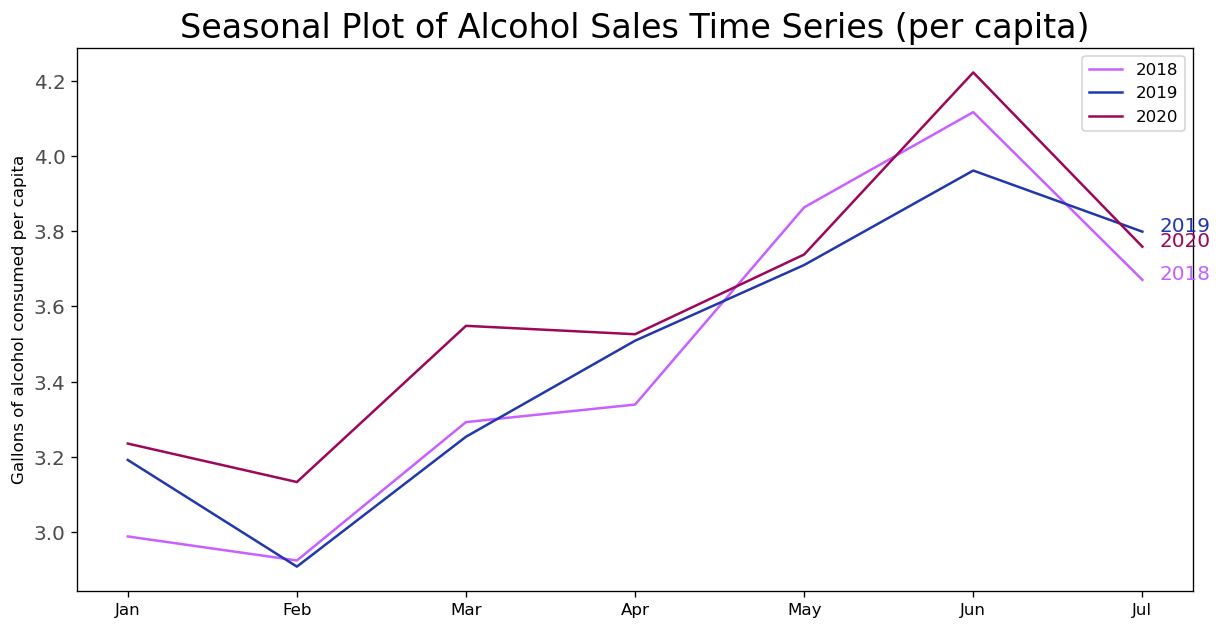

In [134]:
# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
fig, ax = plt.subplots(figsize=(12,6))
for i, y in enumerate(years):
    if i > 0:        
        subset = national_groupby.loc[national_groupby.Year ==y].copy()
        plt.plot('Month.1', 'PerCapita', 
                 data=subset, 
                 color=mycolors[i], 
                 label=y)
        plt.text(subset.shape[0]-.9, subset["PerCapita"][-1:].values[0], y, fontsize=12, color=mycolors[i])

# Decoration
# ax.set_xticklabels(month_names)
plt.yticks(fontsize=12, alpha=.7)
plt.ylabel("Gallons of alcohol consumed per capita")
plt.title("Seasonal Plot of Alcohol Sales Time Series (per capita)", fontsize=20)
plt.legend()
plt.show()

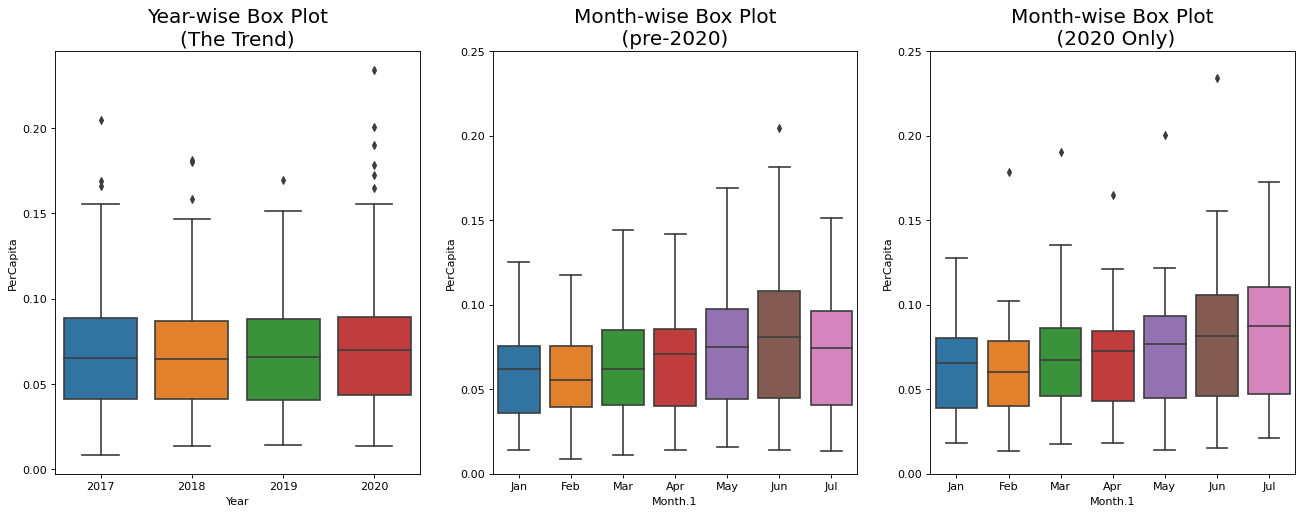

In [135]:
# Draw Plot
fig, axes = plt.subplots(1, 3, figsize=(20,7), dpi= 80)
sns.boxplot(x='Year', y='PerCapita', data=updated_df, ax=axes[0])
sns.boxplot(x='Month.1', y='PerCapita', data=updated_df.loc[updated_df.Year < 2020], ax = axes[1])
sns.boxplot(x='Month.1', y='PerCapita', data=updated_df.loc[updated_df.Year == 2020], ax = axes[2])


# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18)
axes[1].set_title('Month-wise Box Plot\n (pre-2020) ', fontsize=18)
axes[2].set_title('Month-wise Box Plot\n (2020 Only)', fontsize=18)

axes[1].set_ylim(0, 0.25)
axes[2].set_ylim(0, 0.25)

plt.show()

# Linear Regression: Alcohol Consumption Per Capita Against COVID Stringency

In [140]:
# File to load for severity index - file already cleaned for states with available alcohol data
file_path_2 = "cleaned_covid_stringency_index.csv"

# Read Purchasing File and store into Pandas data frame
covid_stringency_index = pd.read_csv(file_path_2)

covid_stringency_index.head()

,RegionName,Average Stringency Index,Average Stringency Legacy Index,Average Government Response,Average Containment Health Risk,Average Economic Support Index
0,Alaska,40.972890,49.336651,44.245046,43.530826,48.165138
1,Arkansas,36.332156,42.355596,35.971743,38.969220,19.266055
2,Colorado,41.367936,45.093624,39.550550,39.496468,39.850917
3,Connecticut,42.490046,48.216651,43.641789,44.528440,38.761468
4,Delaware,48.011422,52.954587,47.494633,48.290780,43.119266


In [141]:
#file to load for cleaned state by state alcohol consumption
file_path_3 = "grouped_state_df.csv"

# Read Purchasing File and store into Pandas data frame
grouped_state_df_file = pd.read_csv(file_path_3)

grouped_state_df_file.head()

,State,Count,Gallons,Ethanol,Total Population,Avg PerCapita
0,Alaska,132,6165264,6165264,590760,0.079049
1,Arkansas,132,16429378,16429378,2465297,0.050443
2,Colorado,132,49557495,49557495,4715895,0.079425
3,Connecticut,129,26302609,26302609,3019150,0.067557
4,Delaware,129,10447503,10447503,808146,0.100049


In [142]:
#Merge files
merged_df = pd.concat([covid_stringency_index, grouped_state_df_file], axis=1, join='inner')
df.set_index('State', inplace=True)

merged_df.head()

,RegionName,Average Stringency Index,Average Stringency Legacy Index,Average Government Response,Average Containment Health Risk,Average Economic Support Index,State,Count,Gallons,Ethanol,Total Population,Avg PerCapita
0,Alaska,40.972890,49.336651,44.245046,43.530826,48.165138,Alaska,132,6165264,6165264,590760,0.079049
1,Arkansas,36.332156,42.355596,35.971743,38.969220,19.266055,Arkansas,132,16429378,16429378,2465297,0.050443
2,Colorado,41.367936,45.093624,39.550550,39.496468,39.850917,Colorado,132,49557495,49557495,4715895,0.079425
3,Connecticut,42.490046,48.216651,43.641789,44.528440,38.761468,Connecticut,129,26302609,26302609,3019150,0.067557
4,Delaware,48.011422,52.954587,47.494633,48.290780,43.119266,Delaware,129,10447503,10447503,808146,0.100049


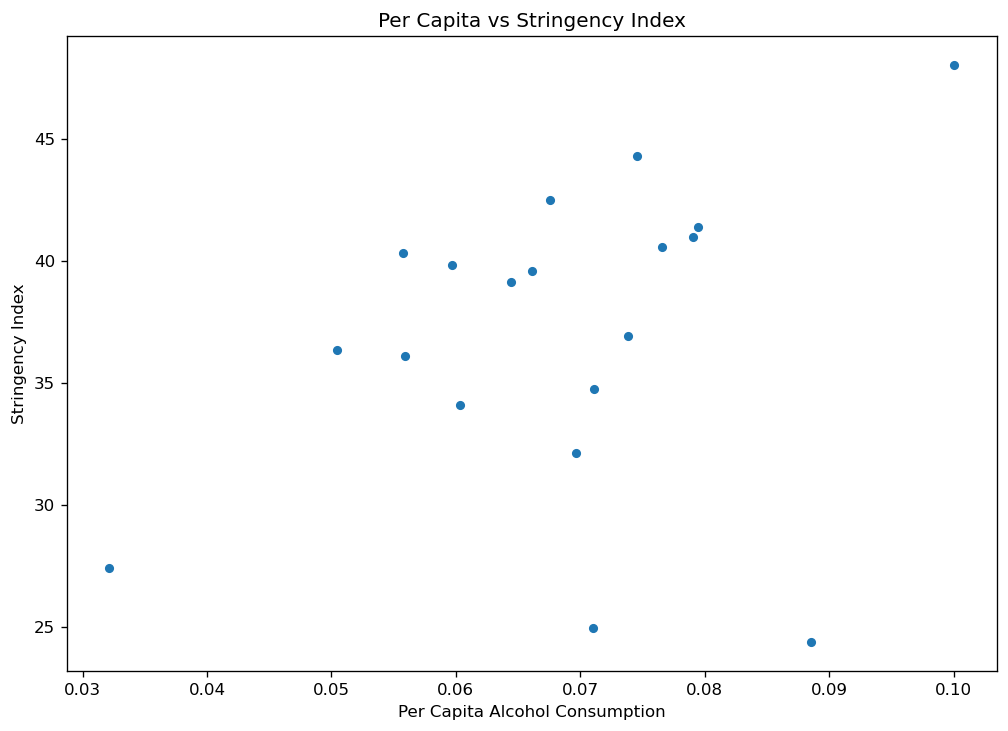

In [145]:
# Generate a scatter plot of perCapita alcohol consumption vs. average stringency index per State

#Assign variables for perCapita alcohol consumption and stringency 
per_capita_2 = merged_df['Avg PerCapita']
stringency_index_2 = merged_df['Average Stringency Index']

#create datagram for above variables
per_capita_stringency_index = pd.DataFrame({
    "Per Capita Alcohol Consumption": per_capita_2,
    "Stringency Index": stringency_index_2
})

#Plot
per_capita_stringency_index.plot.scatter(x="Per Capita Alcohol Consumption", y="Stringency Index", title="Per Capita vs Stringency Index")

In [146]:
# Calculate the correlation coefficient and linear regression model 
# for per capita and strngency index for all states
correlation = st.pearsonr(per_capita_2,stringency_index_2)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.31


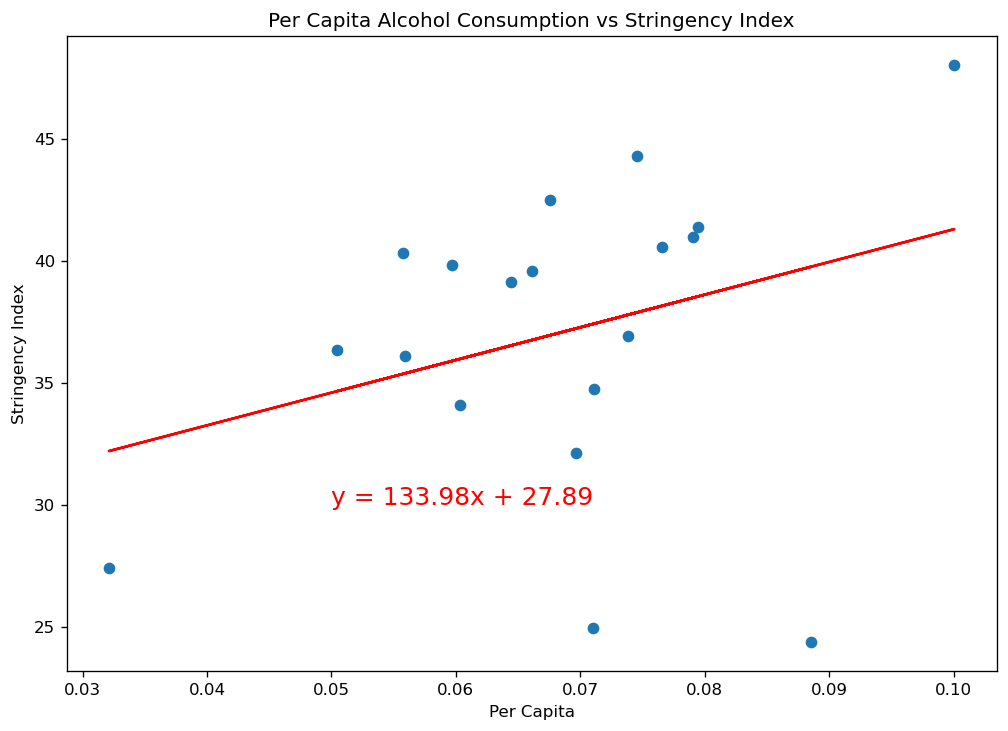

In [147]:
#Map out linear regression analysis
x_values = per_capita_2
y_values = stringency_index_2
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(.05,30),fontsize=15,color="red")
plt.xlabel('Per Capita')
plt.ylabel('Stringency Index')
plt.title("Per Capita Alcohol Consumption vs Stringency Index")
plt.show()